# SDOF system.

In [1]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

In [2]:
def model(z , t , M , C , K , f_0 , ome , sismo):
    """
    z would be the solution vector
    dzdt stores the system of ODEs ready for integration.
    """
    U = z[0]
    V = z[1]
#    f_t = f_0*np.sin(ome*t)
    f_t  = inertial(M , sismo , t )
    dUdt = V
    dVdt = (1/M)*(f_t - C*V - K*U)
    dzdt = [dUdt , dVdt]
    
    return dzdt

In [3]:
def inertial(M , sismo , t  ):
    """
    
    """
    ndats = len(sismo)
    t_max = (ndats-1)*0.02
    tt  = np.linspace(0 , t_max , ndats)
    accel = interp1d(tt , sismo)
    accel_new = accel(t)
    
    f_t =-M*accel_new
    return f_t

## (1)-Simple sdof oscillator

Consider the following oscillator

$$M\ddot U(t)+C\dot U(t)+KU(t)=F_0S_{\omega t}$$

Performing the change of variables we convert the 2-nd order ODE into a system of first order ODEs:

$$\dot U(t)= V(t)$$

$$\dot V(t)=\frac1M \lbrack F_0S_{\omega t}-CV(t)-KU(t)\rbrack .$$

In [4]:
sismo = np.loadtxt('medellin.txt')
ndats = len(sismo)
t_max = (ndats-10)*0.02
sismo = sismo*9.8
t  = np.linspace(0 , t_max , ndats)

<IPython.core.display.Javascript object>


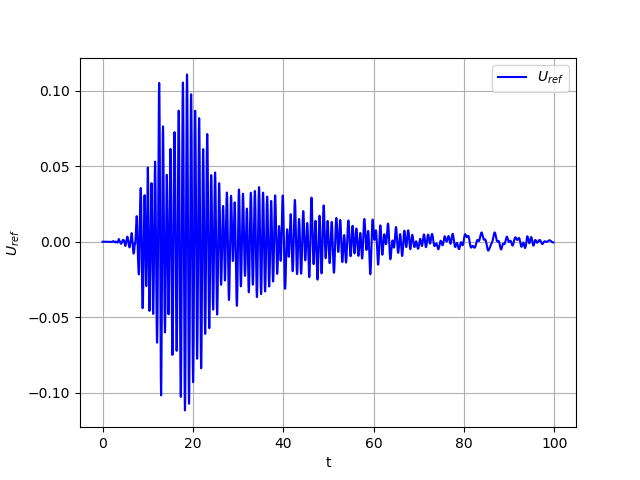

In [5]:
# System parameters
M   = 1.0                        #Building mass
C   = 0.2                        #Building dashpot coefficient
K   = 50.0                       #Building stiffness
f_0 = 10.0                       #Building amplitude of the applied force
ome = 7.0                     #Frequency of applied force
#
y0 = [0.0 , 0.0]                 # Initial conditions
#t  = np.linspace(0 , t_max , ndats)    #Time span
#
#------Integrate---------
#
sol  = odeint(model , y0 , t , args=(M , C , K , f_0 , ome , sismo ))
#
#------Plot---------
#
plt.figure(0)
U_ref = sol[:, 0]
plt.plot(t , U_ref , 'b', label='$U_{ref}$')
plt.legend(loc='best')
#plt.axis([0 , 20.0 , -0.1 , 0.1])
plt.ylabel('$U_{ref}$')
plt.xlabel('t')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


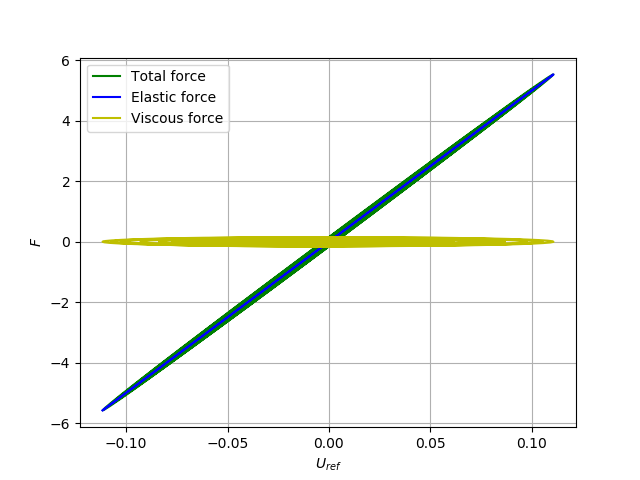

In [6]:
plt.figure(1)
V_ref = sol[: , 1]
F_r = K*U_ref + C*V_ref
plt.plot(U_ref , F_r , 'g', label='Total force')
F_s = K*U_ref 
plt.plot(U_ref , F_s , 'b', label='Elastic force')
F_v = C*V_ref 
plt.plot(U_ref , F_v , 'y', label='Viscous force')
plt.legend(loc='best')
plt.xlabel('$U_{ref}$')
plt.ylabel('$F$')
plt.grid()
plt.show()

In [292]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()